# Phase 4



## Unsupervised ML (Clustering)



Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.



Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"



4.2  Create DataFrame for each cluster that shows data according to the areas.



4.3  "Analyse your clusters and prepare a report that explains all your observations.



Example - 



1. What is impacting more crimes in sensitive areas. 



2. What needs to be done to reduce crime. 



3. Most safe and unsafe districts.



4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"



4.4   Capstone project overall story in your own words. Min 1000 words.

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
district_wise=pd.read_csv(r"C:\Users\pradu\Downloads\Compressed\India_Crime - Copy\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [6]:
district_wise

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [8]:
district_wise=district_wise[['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'RAPE',
 'KIDNAPPING & ABDUCTION',
 'DACOITY',
 'ROBBERY',
 'BURGLARY',
 'RIOTS',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT']]

In [9]:
for i in range(len(district_wise['STATE/UT'])):
    if(district_wise['STATE/UT'][i]=='DELHI UT'):
        district_wise['STATE/UT'][i]='DELHI'

In [10]:
district_wise['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [11]:
district_wise=district_wise[district_wise['DISTRICT']!='TOTAL']

In [12]:
districtwise_sc=pd.read_csv(r"C:\Users\pradu\Downloads\Compressed\India_Crime - Copy\India_Crime - Copy\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [13]:
districtwise_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [14]:
districtwise_sc['TOTAL CRIMES AGAINST SC']=districtwise_sc.iloc[:,3:].sum(axis=1)

In [15]:
districtwise_sctot=districtwise_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]

In [16]:
districtwise_sctot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1
9016,PUDUCHERRY,PUDUCHERRY,2012,23


In [17]:
districtwise_sctot=districtwise_sctot[districtwise_sctot['DISTRICT']!='TOTAL']

In [18]:
districtwise_st=pd.read_csv(r"C:\Users\pradu\Downloads\Compressed\India_Crime - Copy\India_Crime - Copy\02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [19]:
districtwise_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [20]:
districtwise_st=districtwise_st[districtwise_st['DISTRICT']!='TOTAL']

In [21]:
districtwise_st['TOTAL CRIMES AGAINST ST']=districtwise_st.iloc[:,3:].sum(axis=1)

In [22]:
districtwise_sttot=districtwise_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]

In [23]:
districtwise_sttot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


In [24]:
districtwise_child=pd.read_csv(r"C:\Users\pradu\Downloads\Compressed\India_Crime - Copy\India_Crime - Copy\03_District_wise_crimes_committed_against_children_2001_2012.csv")

In [25]:
districtwise_child['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [26]:
districtwise_child=districtwise_child[districtwise_child['DISTRICT']!='TOTAL']

In [27]:
districtwise_child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [28]:
districtwise_child.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes',
       'TOTAL CRIMES AGAINST CHILDREN'],
      dtype='object')

In [29]:
districtwise_childtot=districtwise_child[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]

In [30]:
districtwise_childtot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


In [31]:
districtwise_women=pd.read_csv(r"C:\Users\pradu\Downloads\Compressed\India_Crime - Copy\India_Crime - Copy\42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [32]:
districtwise_women['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [33]:
districtwise_women=districtwise_women[districtwise_women['DISTRICT']!='TOTAL']

In [34]:
districtwise_women['TOTAL CRIMES AGAINST WOMEN']=districtwise_women.iloc[:,3:].sum(axis=1)

In [35]:
districtwise_womentot=districtwise_women[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]

In [36]:
districtwise_womentot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


In [42]:
cluster=pd.merge(district_wise,districtwise_sctot,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_sttot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_childtot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_womentot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

In [43]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)

In [44]:
cluster


,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,15,3,12,5,9,90,17,1,11,99,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,118,92,73,4,63,708,115,9,80,910,0,33,206,458
2,A & N ISLANDS,CAR,2012,2,0,1,1,0,0,0,0,0,4,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11
4,A & N ISLANDS,NORTH,2012,5,4,0,0,1,6,0,0,0,8,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,24078,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,24078,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,24078,42,2,31,13,15,1,26,3,0,0,0,1,7,61
822,WEST BENGAL,SILIGURI_PC,2012,32,21,123,3,29,3,9,0,3,812,0,8,44,552


In [45]:
x=cluster.iloc[:,2:]

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [48]:
y_kmeans=kmeans.fit_predict(x)

In [49]:
# 4.2  Create DataFrame for each cluster that shows data according to the areas.
## Region 1) Peaceful Areas
peaceful_regions=cluster[y_kmeans==0]

In [50]:
peaceful_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
1,A & N ISLANDS,ANDAMAN,20059,118,92,73,4,63,708,115,9,80,910,0,33,206,458
3,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11
12,ANDHRA PRADESH,GUNTAKAL RLY.,24078,75,3,10,15,31,0,4,66,2,75,7,0,7,57
28,ANDHRA PRADESH,SECUNDERABAD RLY.,24078,104,7,9,8,54,6,16,169,2,138,9,2,1,53
33,ANDHRA PRADESH,VIJAYAWADA RLY.,24078,32,4,9,7,34,2,14,99,1,146,12,1,9,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,WEST BENGAL,PURAB MIDNAPUR,22077,707,555,1042,92,184,156,4082,18,68,113,34,6,89,7020
819,WEST BENGAL,PURULIA,24078,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,24078,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,24078,42,2,31,13,15,1,26,3,0,0,0,1,7,61


In [51]:
## MODERATE Areas
moderate_regions=cluster[y_kmeans==1]

In [52]:
moderate_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,15,3,12,5,9,90,17,1,11,99,0,1,10,54
2,A & N ISLANDS,CAR,2012,2,0,1,1,0,0,0,0,0,4,0,0,2,2
4,A & N ISLANDS,NORTH,2012,5,4,0,0,1,6,0,0,0,8,0,0,7,9
5,A & N ISLANDS,SOUTH,2012,8,8,7,4,1,65,8,1,4,50,0,4,19,36
14,ANDHRA PRADESH,GUNTUR URBAN,6033,150,69,100,6,62,416,23,14,33,2398,139,24,127,1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,WEST BENGAL,BKP CP,2012,89,36,214,16,48,9,125,3,0,143,0,2,22,1336
807,WEST BENGAL,HOWRAH CITY,14038,201,110,392,34,176,76,406,19,31,690,2,1,91,2247
810,WEST BENGAL,JHARGRAM,2012,30,21,21,10,19,3,52,1,1,11,0,2,6,123
814,WEST BENGAL,MIDNAPUR,2001,120,84,74,16,59,39,363,1,23,63,0,0,0,741


In [53]:
## SENSITIVE Areas
sensitive_regions=cluster[y_kmeans==2]

In [54]:
sensitive_regions


,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,24078,1186,672,754,72,237,2519,1016,33,395,16392,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,24078,1922,266,839,137,244,2536,1293,114,444,17682,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,24078,1270,368,907,96,207,2777,973,171,419,13543,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,24078,1196,298,653,39,106,1549,1326,48,337,14301,1537,128,574,5002
10,ANDHRA PRADESH,CYBERABAD,20075,1810,641,1398,141,765,11946,559,88,491,32697,1657,341,296,15411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,WEST BENGAL,24 PARGANAS NORTH,24078,2329,1883,3311,248,739,387,5484,129,140,1879,22,21,1435,24376
795,WEST BENGAL,24 PARGANAS SOUTH,24078,2114,2221,2209,194,392,556,8893,41,129,1864,7,0,238,25115
812,WEST BENGAL,KOLKATA,24078,596,433,1534,151,1007,1434,2993,480,0,19434,17,1,1730,9797
815,WEST BENGAL,MURSHIDABAD,24078,1644,3352,2943,152,391,114,3143,281,248,18652,13,13,923,27004


In [56]:
# 4.3.3  "Analyse your clusters and prepare a report that explains all your observations
# 10 MOST SAFE AREAS
peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)

In [57]:
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [58]:
peaceful_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,DELHI,IGI AIRPORT,16068,8,1,35,1,21,5,3,6,0,6,3,0,14,50,16221
1,ASSAM,CHIRANG,16068,214,199,281,51,55,265,184,8,82,252,0,0,0,952,18611
2,RAJASTHAN,G.R.P.,18045,44,11,40,15,61,20,57,11,4,36,28,5,89,178,18644
3,ASSAM,UDALGURI,16068,325,219,395,71,101,421,189,11,127,720,0,28,0,939,19614
4,ARUNACHAL PRADESH,UPPER DIBANG VALLEY,20075,12,0,2,0,2,32,5,0,0,18,0,1,1,2,20150
5,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11,20150
6,ARUNACHAL PRADESH,K/KUMEY,20075,41,17,17,6,4,55,4,0,5,73,0,26,4,37,20364
7,CHHATTISGARH,DANTEWARA,18051,598,103,67,79,23,439,148,2,71,523,15,71,126,298,20614
8,CHHATTISGARH,NARAYANPUR,20075,187,25,28,86,16,64,5,1,61,191,1,13,11,67,20831
9,HARYANA,MEWAT,16068,167,264,193,98,119,300,892,9,36,925,55,0,190,1706,21022


In [59]:
# 10 MOST  SENSITIVE AREAS
sensitive_regions['OVERALL CRIME']=sensitive_regions.iloc[:,2:].sum(axis=1)

In [60]:
sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [61]:
sensitive=sensitive_regions.reset_index().drop(['index'],axis=1).head(10)

In [62]:
sensitive

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,ANDHRA PRADESH,HYDERABAD CITY,24078,1455,712,1466,121,942,13435,2432,311,433,47343,1293,76,872,19685,114654
1,KARNATAKA,BANGALORE COMMR.,24078,2831,642,3014,529,6740,19968,4665,772,48,37973,1423,16,675,9010,112384
2,ANDHRA PRADESH,CYBERABAD,20075,1810,641,1398,141,765,11946,559,88,491,32697,1657,341,296,15411,88316
3,ANDHRA PRADESH,KARIMNAGAR,24078,1674,853,1534,91,344,3258,2011,62,685,31334,3331,505,2406,16110,88276
4,MAHARASHTRA,MUMBAI COMMR.,14063,1542,1386,1334,226,3209,19916,2364,708,218,28353,186,11,2865,9304,85685
5,WEST BENGAL,MURSHIDABAD,24078,1644,3352,2943,152,391,114,3143,281,248,18652,13,13,923,27004,82951
6,MADHYA PRADESH,JABALPUR,24078,1008,1285,484,19,1174,6035,1137,40,240,35159,952,649,1203,7855,81318
7,MADHYA PRADESH,INDORE,24078,1339,1255,625,73,2326,11729,1616,59,507,20260,1139,421,4401,10392,80220
8,GUJARAT,AHMEDABAD COMMR.,24078,1204,506,2301,471,5292,9392,2434,146,79,16439,798,41,1435,14973,79589
9,MADHYA PRADESH,SAGAR,24078,951,1502,525,18,601,4879,1231,3,447,31377,2324,731,1648,8956,79271


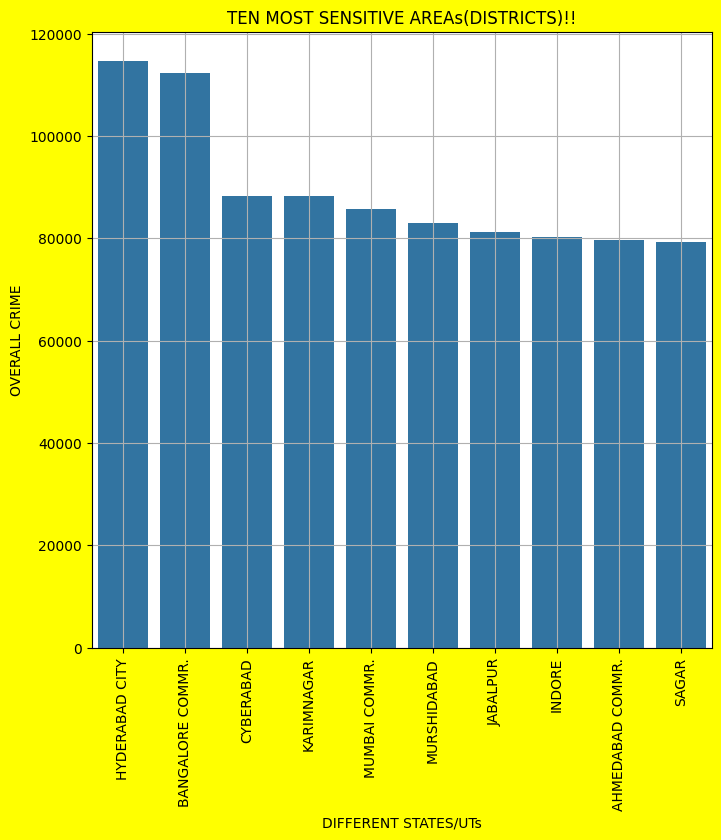

In [63]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("TEN MOST SENSITIVE AREAs(DISTRICTS)!!")
plt.grid()
plt.show()

In [64]:
## 4.3.1  What is impacting more crimes in sensitive areas?
sensitive_reg=sensitive_regions.reset_index().drop(['index'],axis=1).head(50)

<Figure size 2500x9000 with 0 Axes>

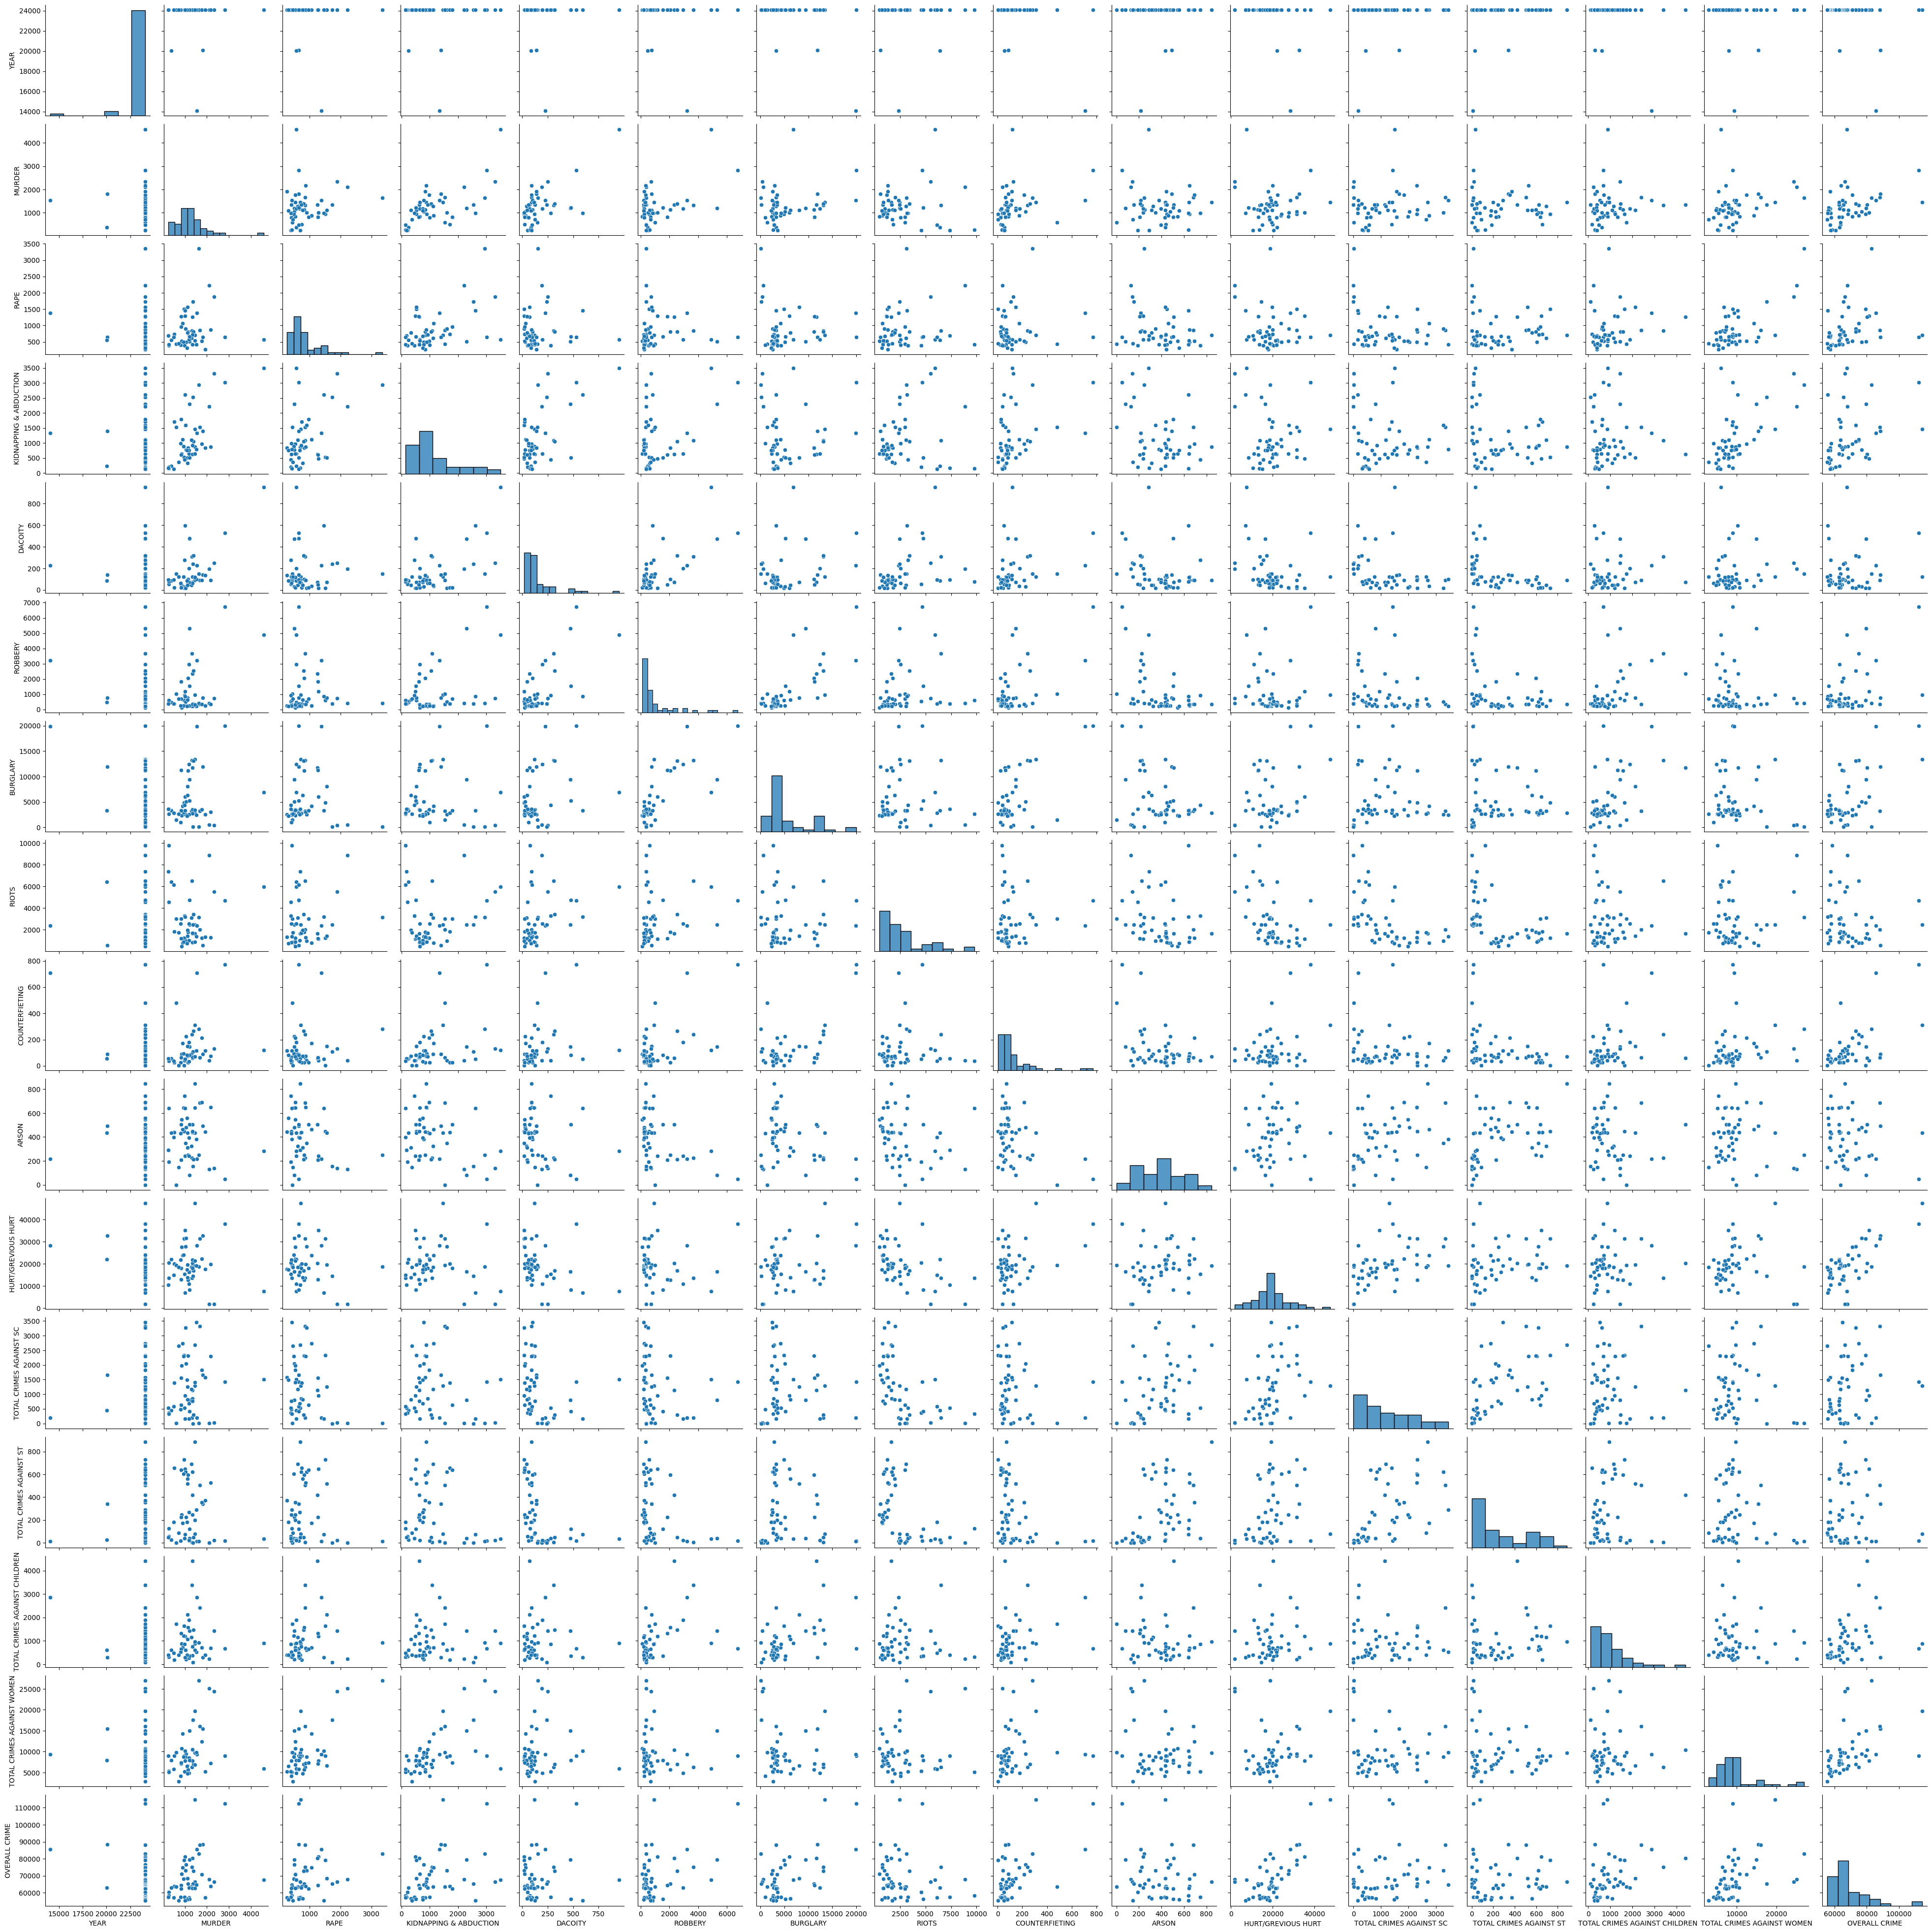

In [65]:
plt.figure(figsize=(25,90))
sns.pairplot(sensitive_reg)
plt.xticks(size=20)
plt.show()

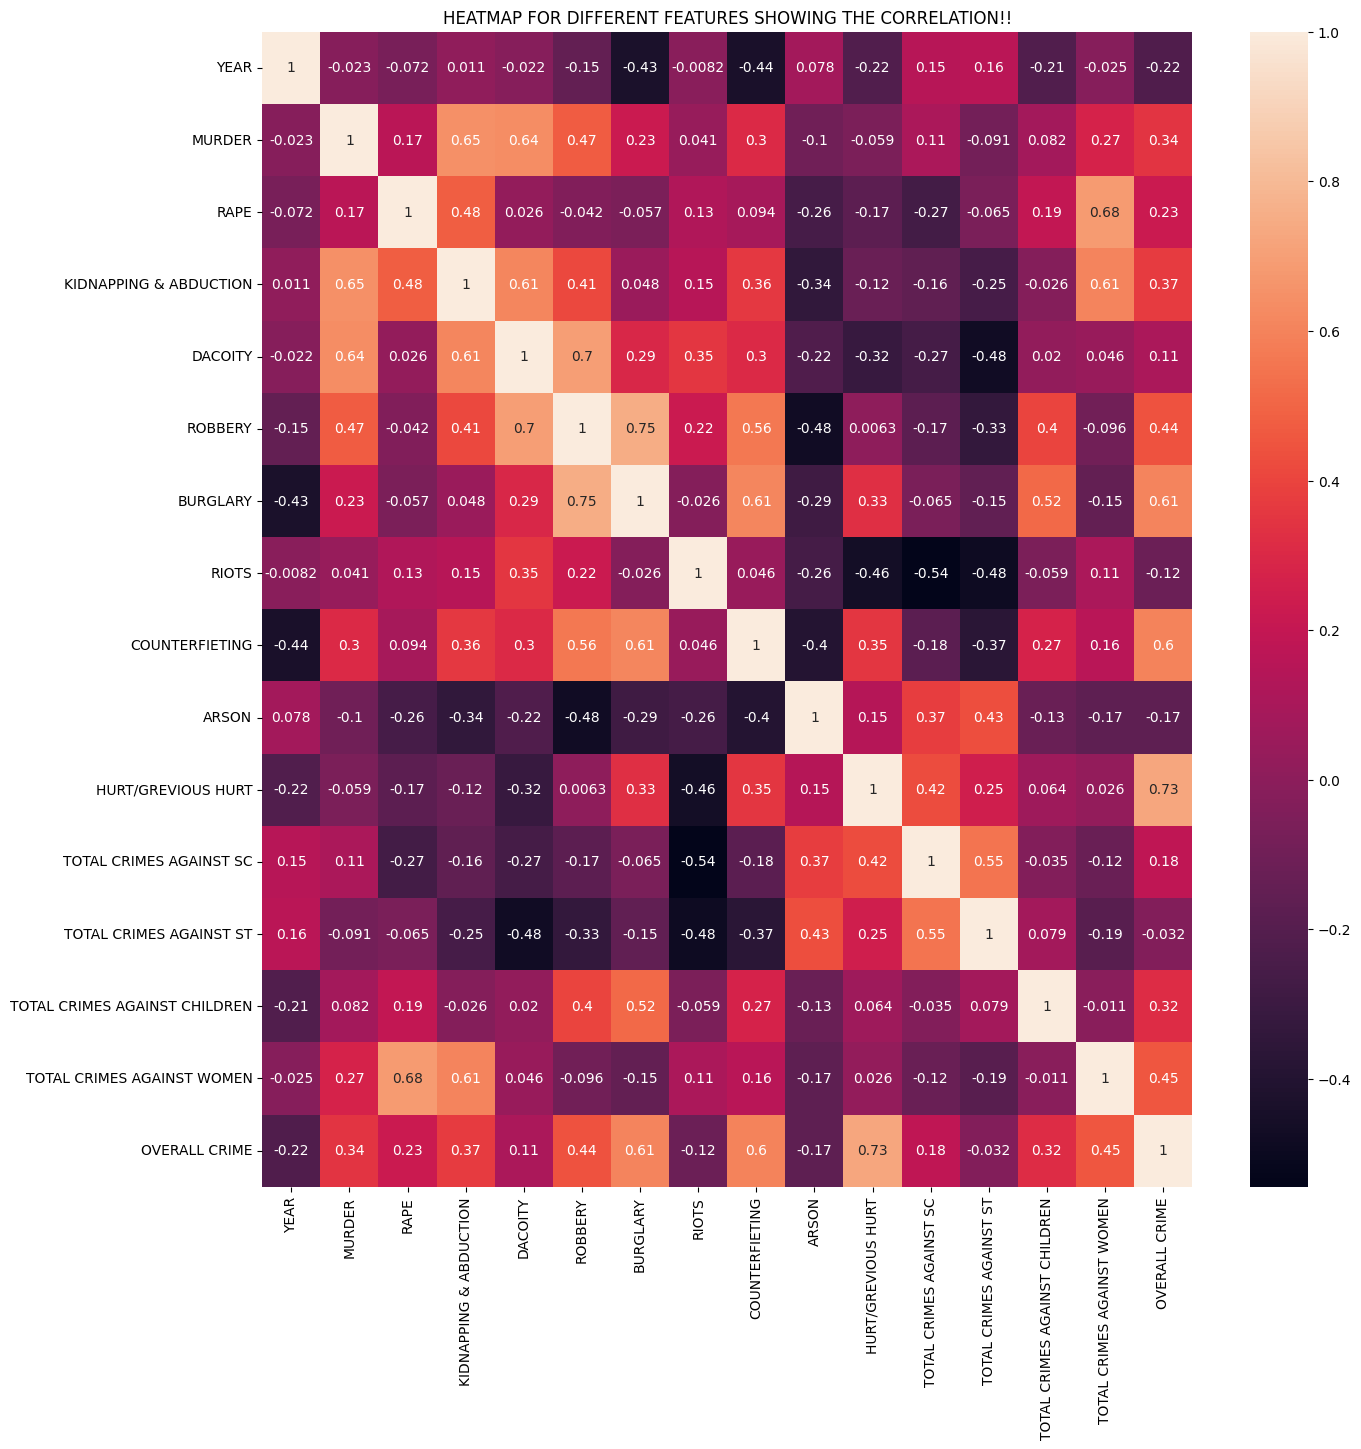

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(sensitive_reg.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

### How To reduce crime in india
Taming crime in India is a complex puzzle requiring teamwork from various players. This includes the government, law enforcement, NGOs, and the public. Let's explore some solutions:

1.  Boost Law Enforcement: Increased funding can improve police capabilities in preventing and investigating crimes. Additionally, reforms are needed to make the force more accountable, efficient, and effective.
2.  Tackle Social Issues: Poverty, unemployment, and lack of education are major crime drivers. The government can create jobs, improve access to education, and provide basic necessities like water, electricity, and healthcare.
3.  Streamline Justice: India's sluggish justice system can be frustrating. Measures should be taken to expedite court processes and make them more responsive to public needs.
4.  Educate the Public: Raising public awareness about the consequences of crime and the importance of reporting it is crucial. Campaigns can educate people on their rights and responsibilities.
5.  Strengthen Community Policing: Building trust between the police and the community is key to crime prevention and solving crimes. Collaborative efforts should identify and address local issues.
6.  Embrace Technology: Technology can be a powerful tool. Investments in modernizing police forces with CCTV cameras, drones, and digital forensics can significantly aid in crime prevention and investigation.
7.  Revamp Prisons: Overcrowded and harsh prison conditions can lead to further criminalization. Reforms are needed to improve prison conditions and offer inmates access to education and vocational training.

`Crime in India: A Complex Challenge`

India, a vast country with over 1.38 billion people, grapples with a significant crime problem. While reported crimes dipped slightly in 2011 compared to the previous year, there's still much work to be done.

`Crimes Against Women and Children Remain High`

Crimes against women, including rape and domestic violence, are a persistent concern. Despite stricter laws and public awareness campaigns, these crimes remain prevalent. Similarly, crimes against children, especially rape and murder, are a major issue. While stricter laws exist, the number of such cases has risen since 2001.

`State-wise Analysis Reveals Variations`

Madhya Pradesh consistently reports the highest number of overall crimes, followed by Uttar Pradesh and Maharashtra. However, crime patterns differ across states. For instance, crimes against children show a worrying increase, with Madhya Pradesh leading the pack. Conversely, Jammu & Kashmir saw a significant drop in assaults on police personnel.

`Police Challenges and Corruption`

While police face assaults from mobs and in conflict zones, there's a concerning trend of rising attacks on officers. Additionally, corruption within the police force weakens public trust and discourages people from seeking help.

`Looking Ahead: Solutions for a Safer India`

To effectively address crime, the government needs a multi-pronged approach:

Improve Law Enforcement: Allocate more resources, implement police reforms, and tackle corruption.
Public Awareness: Educate the public on crime prevention and encourage reporting.
Socio-Economic Factors: Address poverty, unemployment, and lack of education, which contribute to crime.

`Conclusion`

India faces a complex crime challenge. By focusing on better law enforcement, public awareness, and social issues, the government can create a safer environment for all its citizens.

This revised version condenses the information, uses a clearer structure, and highlights key points. It also removes unnecessary repetition and focuses on solutions.